In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from mpl_toolkits.mplot3d import Axes3D
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
#from minisom import MiniSom
import os
from matplotlib import cm
from matplotlib.colors import ListedColormap

1186


(-0.5, 499.5, 499.5, -0.5)

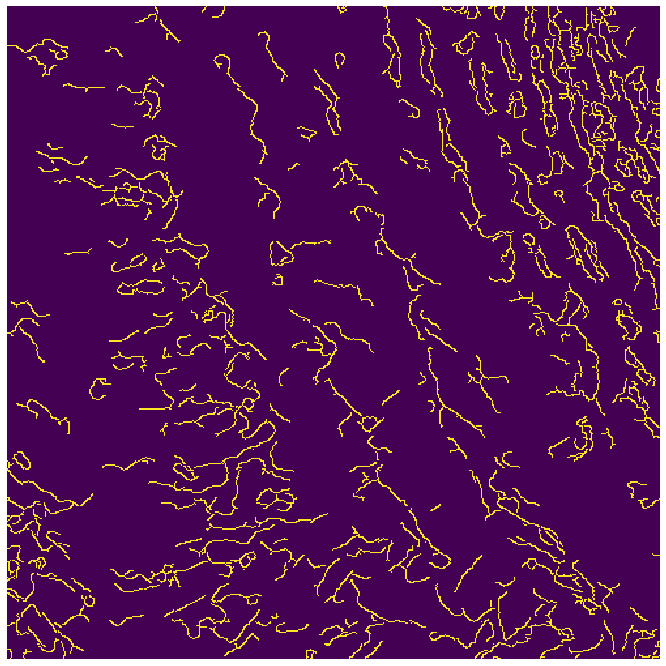

In [2]:
#fig = plt.figure()
#plt.gray()  # show the filtered result in grayscale
#ax1 = fig.add_subplot(121)  # left side
#ax2 = fig.add_subplot(122)  # right side
#img = cv2.imread("/Users/tschmidt/Desktop/93060443_521533372071021_4184655849890775040_n.png",cv2.IMREAD_GRAYSCALE)

#path = "/Users/tschmidt/Desktop/sobel/"
path = "/Users/tschmidt/Desktop/canny/"
dm1 = (500,500)

dataset = []
i = 0
for filename in os.listdir(path):
    if filename == "canny_image_33.png":
        print(i)
    img = cv2.imread(path + filename,cv2.IMREAD_GRAYSCALE)
    img = img.flatten()
    dataset.append(img)
    i = i +1

dataset = np.column_stack(dataset)

fig = plt.figure(figsize=(16,12))

plt.imshow(np.reshape(dataset[:,1186],dm1))

plt.axis("off")

In [3]:
print(dataset.shape)

(250000, 1310)


Text(0, 0.5, 'Fraction of Variance Explained')

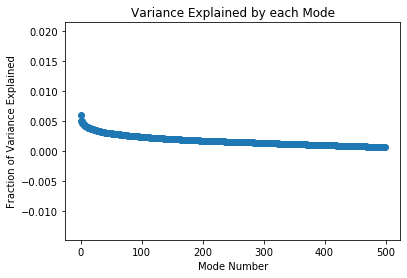

In [4]:
#n_modes = np.shape(dataset)[1]
n_modes = 500
pca_func = PCA(n_components = n_modes)

PCs = pca_func.fit_transform(dataset)
eigvecs = pca_func.components_
fracVar = pca_func.explained_variance_ratio_

plt.scatter(range(n_modes), fracVar)
plt.title("Variance Explained by each Mode")
plt.xlabel("Mode Number")
plt.ylabel("Fraction of Variance Explained")

0.8506415122174285


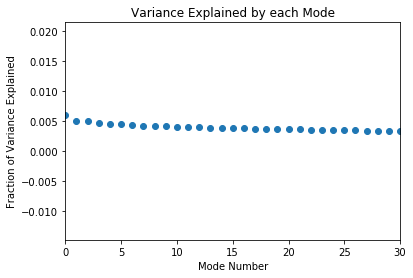

In [5]:
plt.scatter(range(n_modes), fracVar)
plt.xlim([0,30])
plt.title("Variance Explained by each Mode")
plt.xlabel("Mode Number")
plt.ylabel("Fraction of Variance Explained")

print(np.sum(fracVar[:500]))

(-0.5, 499.5, 499.5, -0.5)

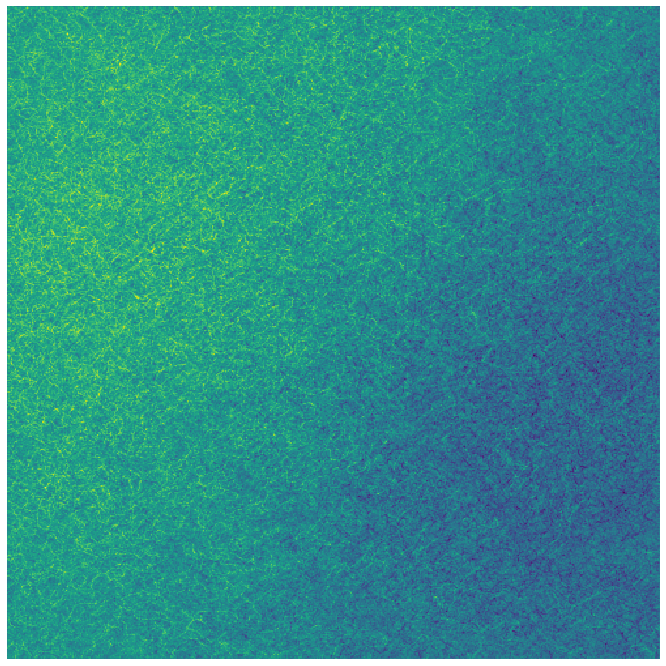

In [6]:
#TODO: WORK WITH THE PCS
out1 = PCs[:,0]
out1 = np.reshape(out1,dm1)

fig = plt.figure(figsize=(16,12))

plt.imshow(out1)
plt.axis("off")

(-0.5, 499.5, 499.5, -0.5)

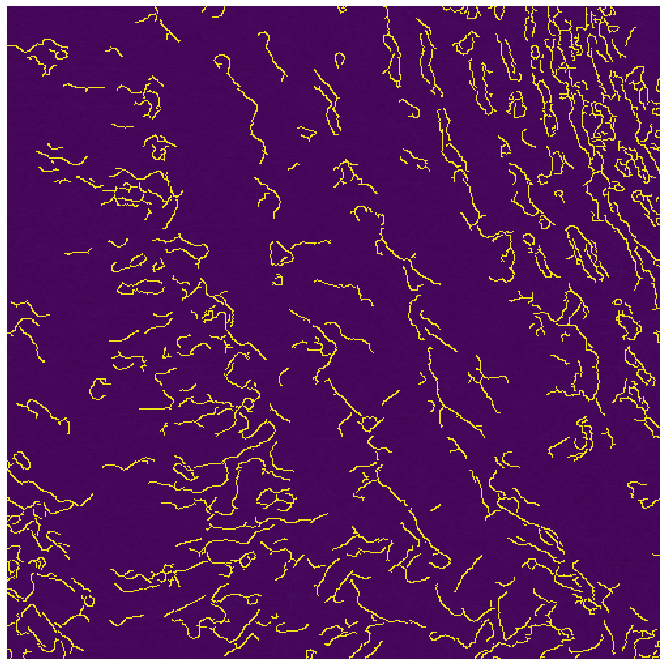

In [7]:
#TEST IMAGE RECREATION

X_proj = PCs[:,:500]
X_inv_proj = pca_func.inverse_transform(X_proj)

fig = plt.figure(figsize=(16,12))
plt.imshow(np.reshape(X_inv_proj[:,1186],dm1))

plt.axis("off")

In [8]:
#test = np.matmul(PCs,eigvecs)

#fig = plt.figure(figsize=(16,12))
#plt.imshow(np.reshape(test[:,1186],dm1))

#plt.axis("off")

In [9]:
np.random.seed(5)

#fig = plt.figure()
#ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
n_clusters = 3
PCs_num = 500
data = PCs[:,:PCs_num]

clusters = KMeans(n_clusters = n_clusters).fit(data)

labels = clusters.labels_

cluster_pattern = np.empty((n_clusters,np.shape(data)[1]))
for cluster_num in range(n_clusters):
    inds = np.argwhere(labels==cluster_num)
    cluster_pattern[cluster_num,:] = np.mean(data[inds,:],axis=0)
    
cluster_obs = np.empty((np.shape(data)))
for ind in range(len(data)):
    cluster_obs[ind] = cluster_pattern[labels[ind]]

#TESING
#test1 = []
#for i in range(cluster_obs[:,0].size):
#    test1.append(eigvecs[0]*cluster_obs[i,0] + eigvecs[1]*cluster_obs[i,1] + eigvecs[2]*cluster_obs[i,2])
#test1 = np.array(test1)


#ax1 = fig.add_subplot(121)  # left side
#ax2 = fig.add_subplot(122)  # right side
#ax1.imshow(np.reshape(test1[:,0],dm1))
#ax2.imshow(np.reshape(cluster_obs[:,0],dm1))


In [10]:
#fig = plt.figure(figsize=(16,12))

#obsNum = 0
#vmin = np.min(cluster_obs[:,obsNum])
#vmax = np.max(cluster_obs[:,obsNum])
#plt.imshow(np.reshape(cluster_obs[:,obsNum],dm1),cmap = 'prism')

#plt.axis("off")

In [11]:
#TESING
#test1 = []
#obsNum = 0
#for i in range(cluster_obs[:,0].size):
    #value = 0
    #for j in range(PCs_num):
    #    value = value + eigvecs[j]*cluster_obs[i,j]
#    value = cluster_obs[i,:].T*eigvecs[:PCs_num]
    #value = np.sum(value)
#    test1.append(value)
#test1 = np.sum(test1)

#obsNum = 1186
obsNum = 0

test1 = np.matmul(cluster_obs,eigvecs)

unique = np.unique(test1[:,obsNum])
print(unique)

cmap = cm.get_cmap('jet',unique.size)
for i in range(unique.size):
    ind = np.argwhere(test1 == unique[i])
    test1[ind] = i

fig = plt.figure(figsize=(16,12))
plt.imshow(np.reshape(test1[:,obsNum],dm1),cmap = cmap)

plt.axis("off")

(-0.5, 499.5, 499.5, -0.5)

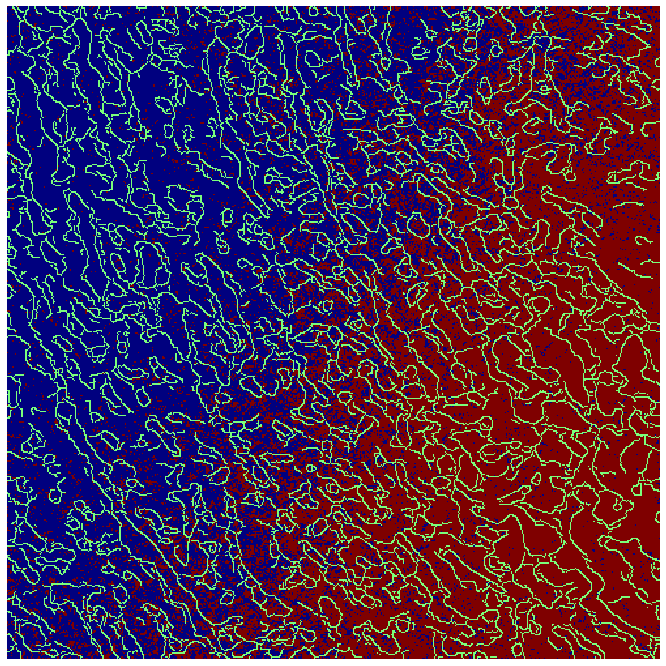

In [12]:
fig = plt.figure(figsize=(16,12))
obsNum = 1186
unique = np.unique(cluster_obs[:,obsNum])
cmap = cm.get_cmap('jet',unique.size)
for i in range(unique.size):
    ind = np.argwhere(cluster_obs == unique[i])
    cluster_obs[ind] = i
plt.imshow(np.reshape(cluster_obs[:,obsNum],dm1),cmap = cmap)

plt.axis("off")